In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
df = pd.read_csv(r"DS-Intern-Assignment-Supriyo-Chakraborty\data\data.csv")

In [69]:
df.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [70]:
df.shape

(16857, 29)

In [71]:
df['timestamp'] = pd.to_datetime(df['timestamp'])


In [72]:
df['hour'] = df['timestamp'].dt.hour      
df['date'] = df['timestamp'].dt.date       
df['dayofweek'] = df['timestamp'].dt.dayofweek  

In [73]:
print(df[['timestamp', 'hour', 'date', 'dayofweek']].head())


            timestamp  hour        date  dayofweek
0 2016-01-11 17:00:00    17  2016-01-11          0
1 2016-01-11 17:10:00    17  2016-01-11          0
2 2016-01-11 17:20:00    17  2016-01-11          0
3 2016-01-11 17:30:00    17  2016-01-11          0
4 2016-01-11 17:40:00    17  2016-01-11          0


In [74]:
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   timestamp                     16857 non-null  datetime64[ns]
 1   equipment_energy_consumption  16013 non-null  object        
 2   lighting_energy               16048 non-null  object        
 3   zone1_temperature             15990 non-null  object        
 4   zone1_humidity                16056 non-null  object        
 5   zone2_temperature             16004 non-null  object        
 6   zone2_humidity                15990 non-null  float64       
 7   zone3_temperature             16055 non-null  float64       
 8   zone3_humidity                15979 non-null  float64       
 9   zone4_temperature             16041 non-null  float64       
 10  zone4_humidity                16076 non-null  float64       
 11  zone5_temperature           

In [75]:
cols_to_convert = [
    'equipment_energy_consumption', 'lighting_energy', 'zone1_temperature',
    'zone1_humidity', 'zone2_temperature'
]

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [76]:
df.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,hour,date,dayofweek
0,2016-01-11 17:00:00,60.0,-77.787786,33.746609,47.596667,19.2,44.790000,19.79,NaN,19.000000,...,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433,17,2016-01-11,0
1,2016-01-11 17:10:00,60.0,30.000000,19.890000,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195,17,2016-01-11,0
2,2016-01-11 17:20:00,50.0,30.000000,19.890000,46.300000,19.2,44.626667,19.79,44.933333,35.921144,...,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668,17,2016-01-11,0
3,2016-01-11 17:30:00,50.0,40.000000,33.746609,46.066667,19.2,44.590000,19.79,45.000000,NaN,...,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389,17,2016-01-11,0
4,2016-01-11 17:40:00,60.0,40.000000,19.890000,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097,17,2016-01-11,0


In [77]:
df.isnull().sum()

timestamp                         0
equipment_energy_consumption    912
lighting_energy                 864
zone1_temperature               949
zone1_humidity                  888
zone2_temperature               923
zone2_humidity                  867
zone3_temperature               802
zone3_humidity                  878
zone4_temperature               816
zone4_humidity                  781
zone5_temperature               838
zone5_humidity                  801
zone6_temperature               848
zone6_humidity                  847
zone7_temperature               794
zone7_humidity                  805
zone8_temperature               848
zone8_humidity                  777
zone9_temperature               773
zone9_humidity                  888
outdoor_temperature             806
atmospheric_pressure            842
outdoor_humidity                799
wind_speed                      828
visibility_index                815
dew_point                       826
random_variable1            

In [78]:

missing_percentage = df.isnull().mean() * 100

missing_percentage_sorted = missing_percentage.sort_values(ascending=False)
print(missing_percentage_sorted)


zone1_temperature               5.629709
zone2_temperature               5.475470
equipment_energy_consumption    5.410215
zone1_humidity                  5.267841
zone9_humidity                  5.267841
zone3_humidity                  5.208519
zone2_humidity                  5.143264
lighting_energy                 5.125467
zone8_temperature               5.030551
zone6_temperature               5.030551
zone6_humidity                  5.024619
atmospheric_pressure            4.994958
zone5_temperature               4.971229
wind_speed                      4.911906
random_variable1                4.900042
dew_point                       4.900042
random_variable2                4.888177
zone4_temperature               4.840719
visibility_index                4.834787
outdoor_temperature             4.781396
zone7_humidity                  4.775464
zone3_temperature               4.757667
zone5_humidity                  4.751735
outdoor_humidity                4.739871
zone7_temperatur

In [79]:

skewness = df.select_dtypes(include=['float64', 'int32']).skew()
print(skewness)


equipment_energy_consumption    0.622693
lighting_energy                 0.231520
zone1_temperature               0.041204
zone1_humidity                 -4.637386
zone2_temperature               0.321937
zone2_humidity                 -4.374132
zone3_temperature              -0.220809
zone3_humidity                 -5.417106
zone4_temperature              -0.354646
zone4_humidity                 -3.360591
zone5_temperature               0.100571
zone5_humidity                 -1.209998
zone6_temperature               0.028654
zone6_humidity                 -0.131490
zone7_temperature               0.234995
zone7_humidity                 -2.591317
zone8_temperature               0.284095
zone8_humidity                 -3.006839
zone9_temperature              -0.160426
zone9_humidity                 -4.360733
outdoor_temperature             0.325758
atmospheric_pressure           -0.083412
outdoor_humidity               -2.015336
wind_speed                      0.130906
visibility_index

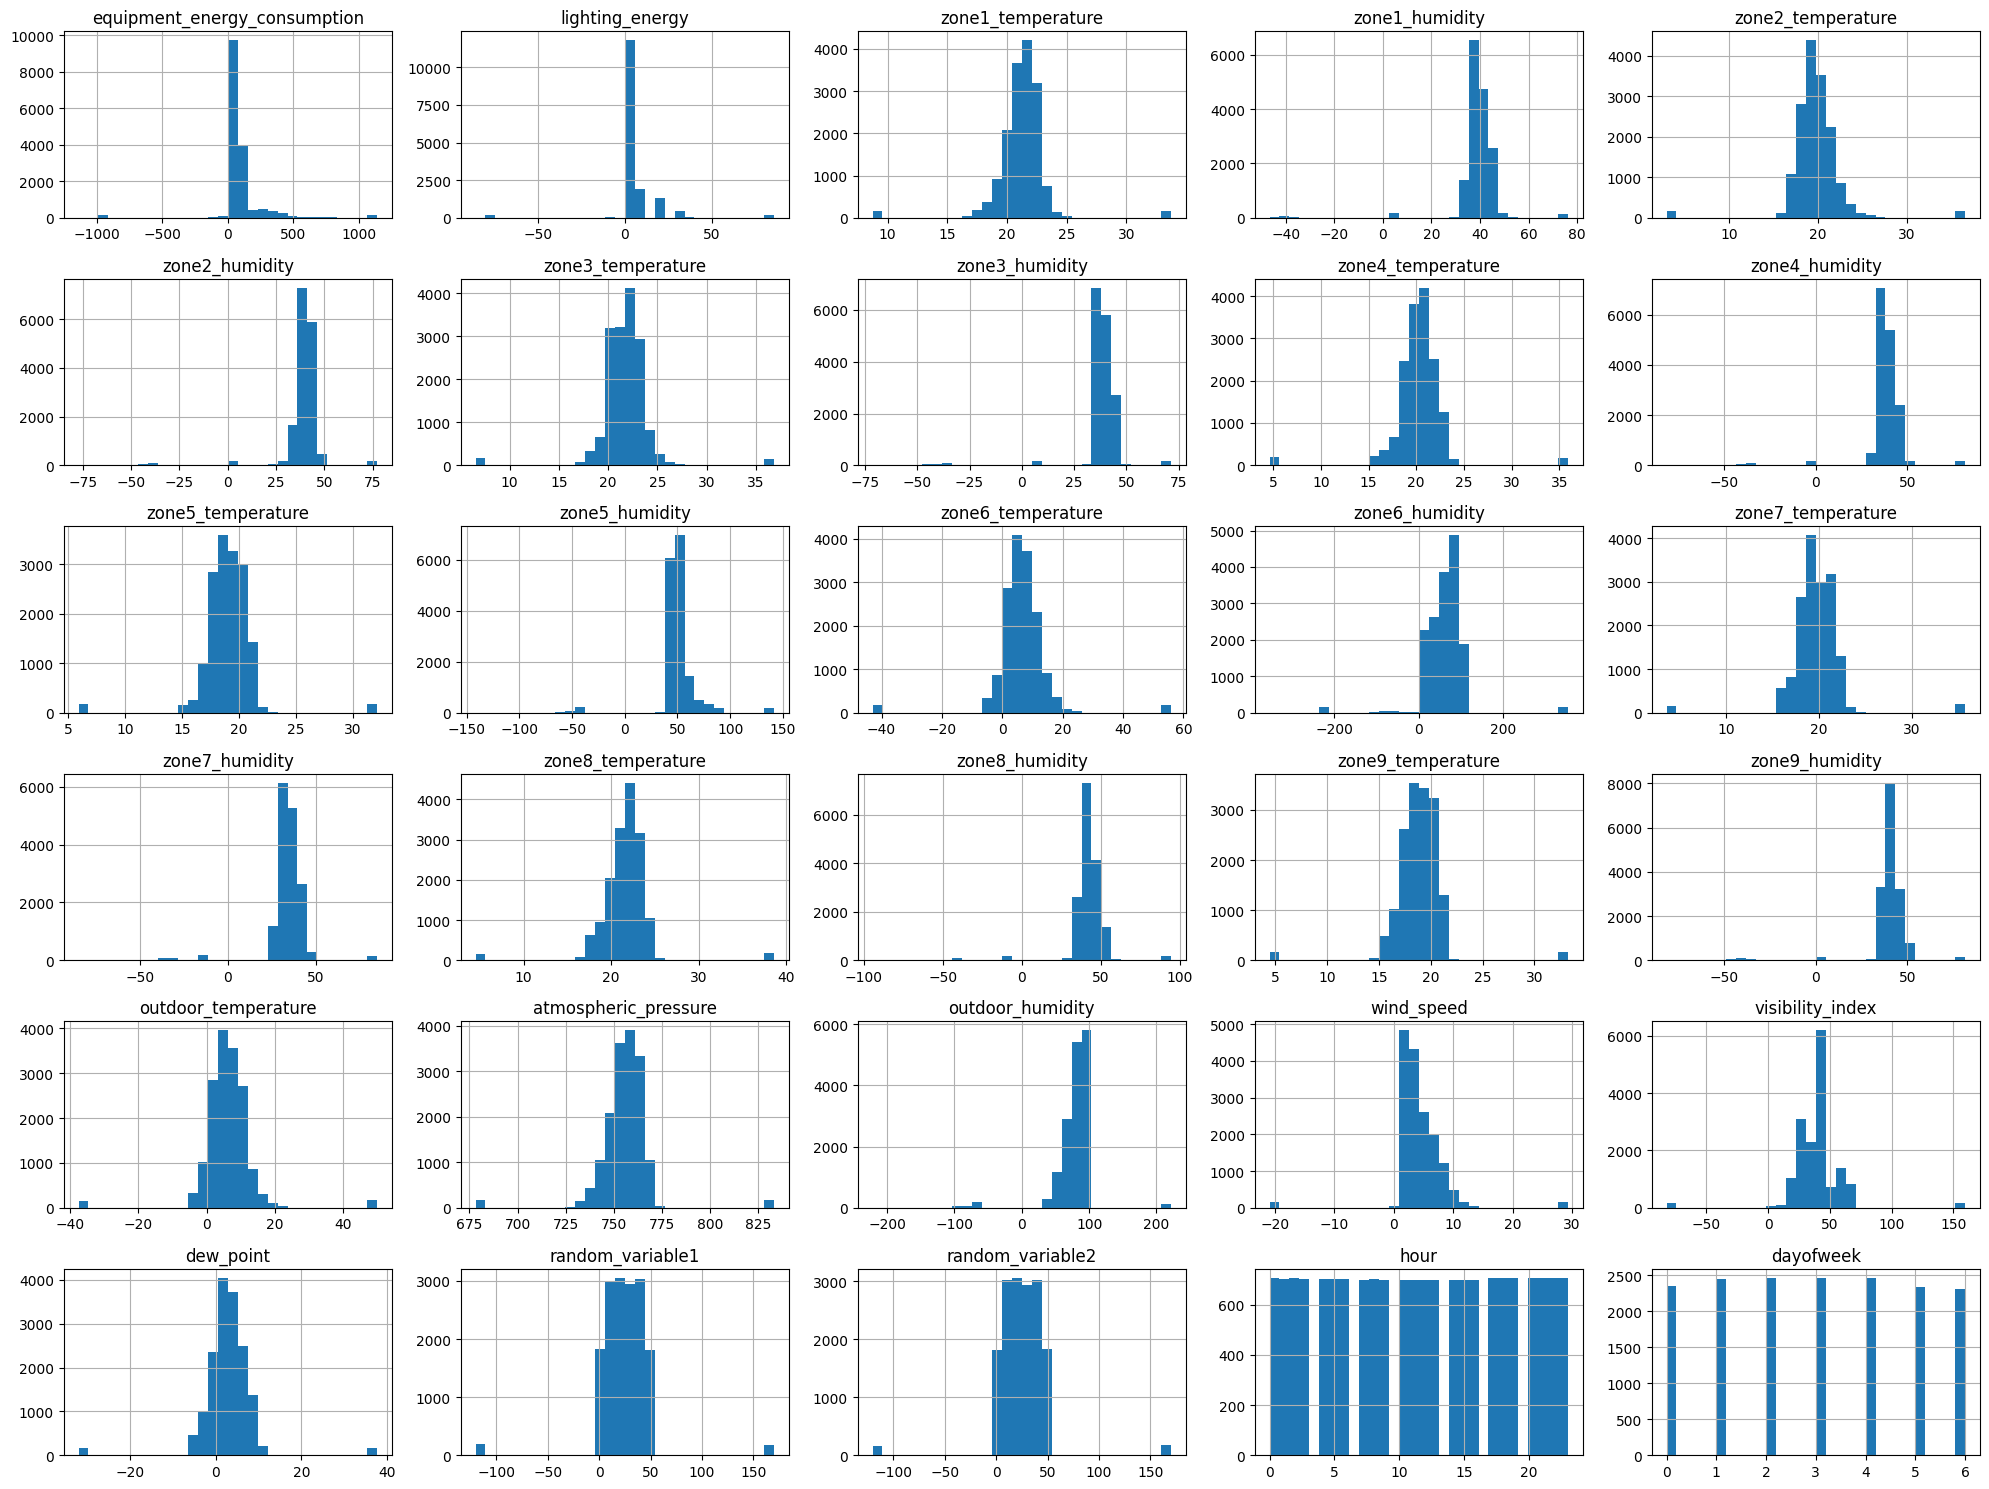

In [80]:
import matplotlib.pyplot as plt

df.select_dtypes(include=['float64', 'int32']).hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()


In [81]:

numeric_cols = df.select_dtypes(include='number').columns




In [82]:
df[numeric_cols] = df[numeric_cols].apply(lambda col: col.fillna(col.median()))


In [83]:
print(df.isnull().sum().sort_values(ascending=False).head())


timestamp                       0
equipment_energy_consumption    0
lighting_energy                 0
zone1_temperature               0
zone1_humidity                  0
dtype: int64


In [84]:
df.isnull().sum()

timestamp                       0
equipment_energy_consumption    0
lighting_energy                 0
zone1_temperature               0
zone1_humidity                  0
zone2_temperature               0
zone2_humidity                  0
zone3_temperature               0
zone3_humidity                  0
zone4_temperature               0
zone4_humidity                  0
zone5_temperature               0
zone5_humidity                  0
zone6_temperature               0
zone6_humidity                  0
zone7_temperature               0
zone7_humidity                  0
zone8_temperature               0
zone8_humidity                  0
zone9_temperature               0
zone9_humidity                  0
outdoor_temperature             0
atmospheric_pressure            0
outdoor_humidity                0
wind_speed                      0
visibility_index                0
dew_point                       0
random_variable1                0
random_variable2                0
hour          

In [85]:
df.describe()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,hour,dayofweek
count,16857,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,...,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000
mean,2016-03-10 02:16:38.647446272,93.872992,3.736255,21.253576,39.055580,19.782540,39.535636,21.670575,38.211662,20.242346,...,6.208130,755.779700,79.223550,4.186361,38.531744,2.781865,24.855569,25.081094,11.506733,2.978881
min,2016-01-11 17:00:00,-1139.985693,-86.002966,8.726818,-46.660000,2.988199,-77.265503,6.543921,-71.406273,4.613485,...,-37.524768,678.159940,-221.668765,-20.929527,-82.329792,-32.098095,-120.170177,-120.409590,0.000000,0.000000
25%,2016-02-09 21:20:00,50.000000,0.000000,20.600000,37.126667,18.666667,37.933333,20.600000,36.754000,19.292500,...,3.166667,751.100000,72.000000,2.000000,29.000000,0.583333,12.808011,12.805830,5.000000,1.000000
50%,2016-03-10 00:10:00,60.000000,0.000000,21.323333,39.226667,19.600000,40.293333,21.767500,38.400000,20.290000,...,6.000000,756.200000,84.166667,4.000000,40.000000,2.750000,24.866978,24.834261,12.000000,3.000000
75%,2016-04-08 03:40:00,90.000000,0.000000,22.100000,42.296667,20.700000,42.790000,22.700000,41.000000,21.290000,...,9.050000,761.733333,91.500000,5.666667,40.000000,5.150000,37.242702,37.277176,18.000000,5.000000
max,2016-12-01 15:50:00,1139.985693,86.002966,33.746609,76.292756,36.552882,77.265503,36.823982,71.406273,35.921144,...,49.853906,833.392675,221.668765,29.318719,159.606156,37.673716,170.156325,170.329617,23.000000,6.000000
std,NaN,177.925361,14.228504,2.103842,9.686901,2.862376,9.867143,2.531931,9.876752,2.714872,...,7.371999,13.298803,27.902210,4.300266,20.799517,5.943530,25.564582,24.892020,6.933696,1.980812


In [86]:
import seaborn as sns

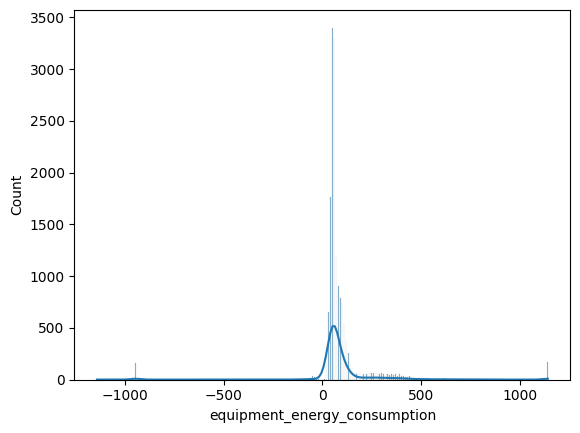

In [87]:
sns.histplot(df['equipment_energy_consumption'], kde=True)
plt.show()


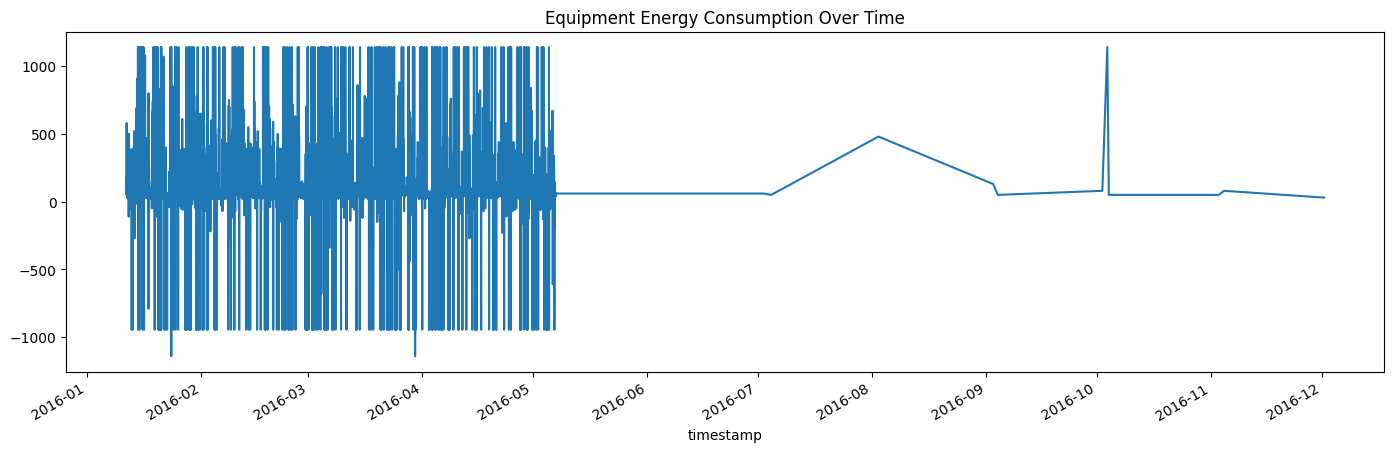

In [88]:
df.set_index('timestamp')['equipment_energy_consumption'].plot(figsize=(17,5))
plt.title("Equipment Energy Consumption Over Time")
plt.show()


In [89]:

Q1 = df['equipment_energy_consumption'].quantile(0.25)
Q3 = df['equipment_energy_consumption'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = max(0, Q1 - 1.5 * IQR)

upper_bound = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)


Q1: 50.0
Q3: 90.0
IQR: 40.0
Lower bound: 0
Upper bound: 150.0


In [90]:
median_value = df['equipment_energy_consumption'].median()
df['equipment_energy_consumption'] = df['equipment_energy_consumption'].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)


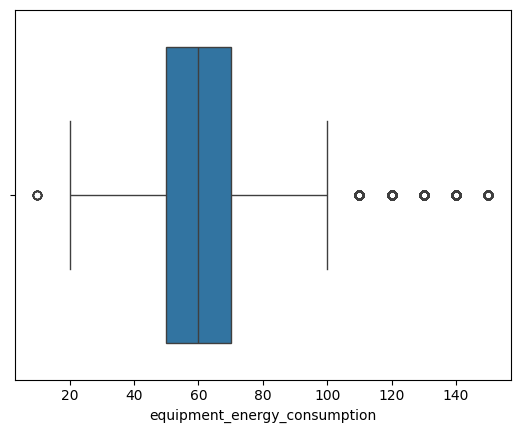

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['equipment_energy_consumption'])
plt.show()


In [92]:
df.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,hour,date,dayofweek
0,2016-01-11 17:00:00,60.0,-77.787786,33.746609,47.596667,19.2,44.790000,19.79,38.400000,19.000000,...,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433,17,2016-01-11,0
1,2016-01-11 17:10:00,60.0,30.000000,19.890000,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195,17,2016-01-11,0
2,2016-01-11 17:20:00,50.0,30.000000,19.890000,46.300000,19.2,44.626667,19.79,44.933333,35.921144,...,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668,17,2016-01-11,0
3,2016-01-11 17:30:00,50.0,40.000000,33.746609,46.066667,19.2,44.590000,19.79,45.000000,20.290000,...,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389,17,2016-01-11,0
4,2016-01-11 17:40:00,60.0,40.000000,19.890000,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097,17,2016-01-11,0


In [94]:
df.dtypes

timestamp                       datetime64[ns]
equipment_energy_consumption           float64
lighting_energy                        float64
zone1_temperature                      float64
zone1_humidity                         float64
zone2_temperature                      float64
zone2_humidity                         float64
zone3_temperature                      float64
zone3_humidity                         float64
zone4_temperature                      float64
zone4_humidity                         float64
zone5_temperature                      float64
zone5_humidity                         float64
zone6_temperature                      float64
zone6_humidity                         float64
zone7_temperature                      float64
zone7_humidity                         float64
zone8_temperature                      float64
zone8_humidity                         float64
zone9_temperature                      float64
zone9_humidity                         float64
outdoor_tempe

In [95]:
df['date'] = pd.to_datetime(df['date'])

Correlation with Equipment Energy Consumption:
equipment_energy_consumption    1.000000
hour                            0.388202
zone8_temperature               0.148342
zone1_temperature               0.147094
zone2_temperature               0.137202
lighting_energy                 0.125050
timestamp                       0.123109
date                            0.119808
zone4_temperature               0.114523
zone5_temperature               0.106639
zone3_temperature               0.104432
outdoor_temperature             0.104012
zone6_temperature               0.095902
zone7_temperature               0.093776
zone9_temperature               0.083628
zone5_humidity                  0.043217
dew_point                       0.040466
dayofweek                       0.040346
zone1_humidity                  0.015934
wind_speed                      0.013327
random_variable2               -0.006295
random_variable1               -0.007917
zone3_humidity                 -0.008005
visibility

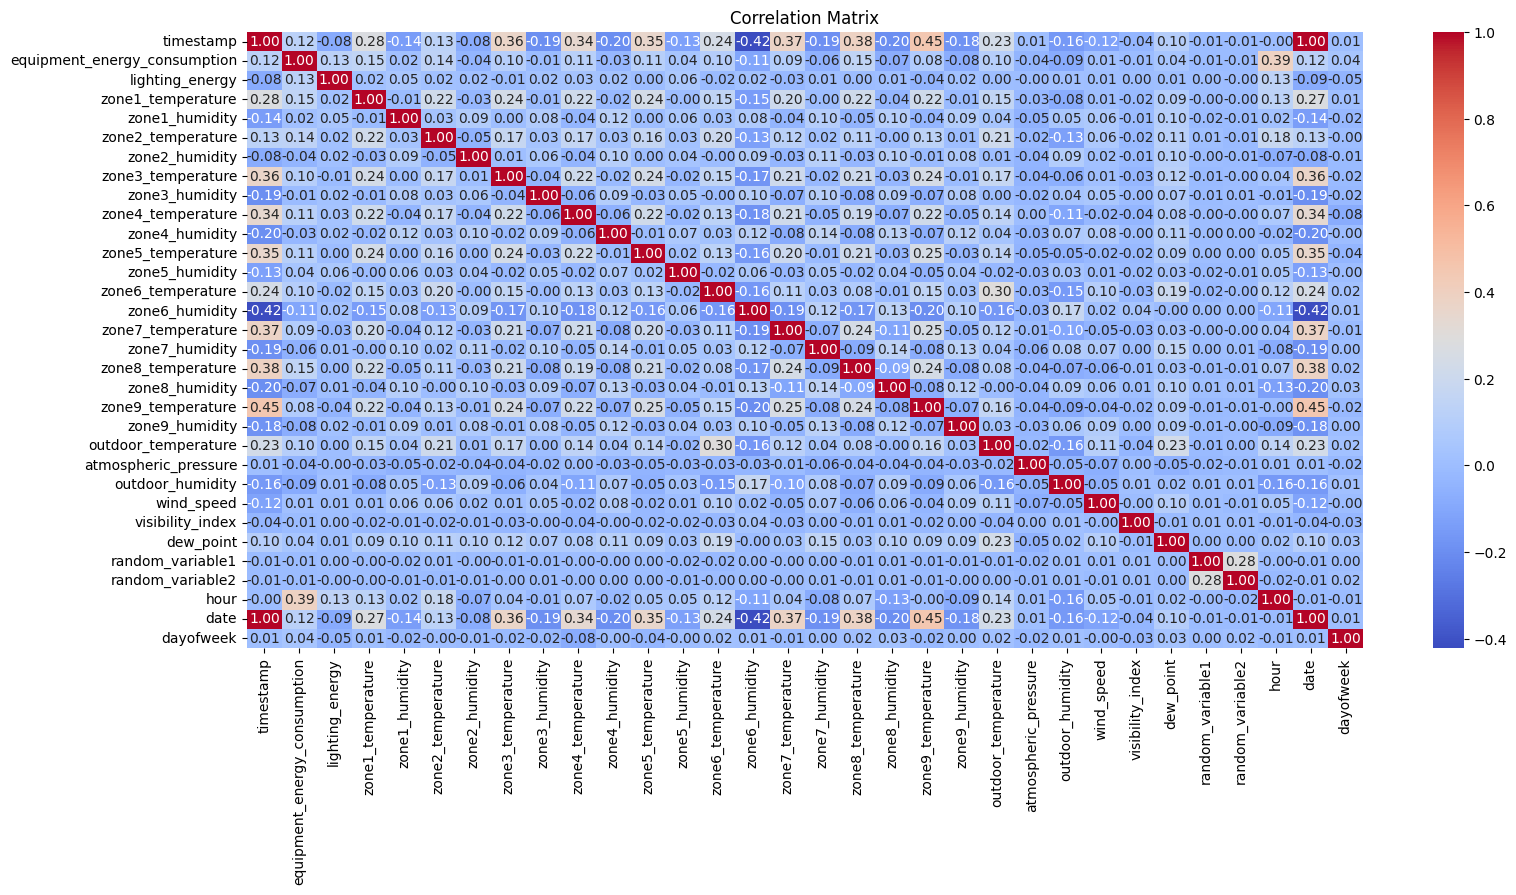

In [96]:

correlation_matrix = df.corr()

print("Correlation with Equipment Energy Consumption:")
print(correlation_matrix['equipment_energy_consumption'].sort_values(ascending=False))


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


In [97]:
from scipy.stats import pearsonr

res1 = pearsonr(df['random_variable1'], df['equipment_energy_consumption'])
res2 = pearsonr(df['random_variable2'], df['equipment_energy_consumption'])

print("Random Variable 1:", res1)
print("Random Variable 2:", res2)


Random Variable 1: PearsonRResult(statistic=np.float64(-0.007916986610844308), pvalue=np.float64(0.3040260570409293))
Random Variable 2: PearsonRResult(statistic=np.float64(-0.006294519142446554), pvalue=np.float64(0.4138179707639502))


In [98]:

df = df.drop(columns=['random_variable1', 'random_variable2'])





In [99]:
df.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,hour,date,dayofweek
0,2016-01-11 17:00:00,60.0,-77.787786,33.746609,47.596667,19.2,44.790000,19.79,38.400000,19.000000,...,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,17,2016-01-11,0
1,2016-01-11 17:10:00,60.0,30.000000,19.890000,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,17,2016-01-11,0
2,2016-01-11 17:20:00,50.0,30.000000,19.890000,46.300000,19.2,44.626667,19.79,44.933333,35.921144,...,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,17,2016-01-11,0
3,2016-01-11 17:30:00,50.0,40.000000,33.746609,46.066667,19.2,44.590000,19.79,45.000000,20.290000,...,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,17,2016-01-11,0
4,2016-01-11 17:40:00,60.0,40.000000,19.890000,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,17,2016-01-11,0


In [100]:
df.dtypes

timestamp                       datetime64[ns]
equipment_energy_consumption           float64
lighting_energy                        float64
zone1_temperature                      float64
zone1_humidity                         float64
zone2_temperature                      float64
zone2_humidity                         float64
zone3_temperature                      float64
zone3_humidity                         float64
zone4_temperature                      float64
zone4_humidity                         float64
zone5_temperature                      float64
zone5_humidity                         float64
zone6_temperature                      float64
zone6_humidity                         float64
zone7_temperature                      float64
zone7_humidity                         float64
zone8_temperature                      float64
zone8_humidity                         float64
zone9_temperature                      float64
zone9_humidity                         float64
outdoor_tempe

In [ ]:

X = df.drop(columns=['equipment_energy_consumption', 'timestamp', 'date'])
y = df['equipment_energy_consumption']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("Linear Regression Results:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


Linear Regression Results:
Mean Squared Error: 459.7107349886985
R-squared: 0.20399746085326964


In [123]:
from sklearn.ensemble import RandomForestRegressor


rf_model = RandomForestRegressor(random_state=42)


rf_model.fit(X_train, y_train)

y_rf_pred = rf_model.predict(X_test)
print("Random Forest Results:")
print("Mean Squared Error:", mean_squared_error(y_test, y_rf_pred))
print("R-squared:", r2_score(y_test, y_rf_pred))


Random Forest Results:
Mean Squared Error: 289.73662811387896
R-squared: 0.4983125820019638


In [124]:
rf_model.feature_importances_

array([0.02451298, 0.02547302, 0.02688875, 0.02657371, 0.0232962 ,
       0.02732564, 0.02422882, 0.02784211, 0.02411405, 0.02527998,
       0.03188064, 0.0235448 , 0.02761958, 0.02260827, 0.02762809,
       0.08925039, 0.0300643 , 0.01856376, 0.0279969 , 0.02334172,
       0.03662775, 0.02546937, 0.02159394, 0.01939544, 0.02738106,
       0.26287212, 0.01642863, 0.01007975, 0.00211821])

In [ ]:
import xgboost as xgb


xgboost_model = xgb.XGBRegressor(objective ='reg:squarederror')
xgboost_model.fit(X_train, y_train)


y_pred_xgb = xgboost_model.predict(X_test)


mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Regression Results:")
print(f"Mean Squared Error: {mse_xgb}")
print(f"R-squared: {r2_xgb}")


XGBoost Regression Results:
Mean Squared Error: 319.9878138938818
R-squared: 0.44593177193958045


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train, y_train)


y_pred_gbr = gbr_model.predict(X_test)

mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting Regression Results:")
print(f"Mean Squared Error: {mse_gbr}")
print(f"R-squared: {r2_gbr}")


Gradient Boosting Regression Results:
Mean Squared Error: 343.419817149088
R-squared: 0.40535857521208374


In [130]:
from sklearn.ensemble import RandomForestRegressor


rf_model = RandomForestRegressor(n_estimators=200,random_state=42)


rf_model.fit(X_train, y_train)

y_rf_pred = rf_model.predict(X_test)
print("Random Forest Results:")
print("Mean Squared Error:", mean_squared_error(y_test, y_rf_pred))
print("R-squared:", r2_score(y_test, y_rf_pred))

Random Forest Results:
Mean Squared Error: 286.6663397093713
R-squared: 0.503628875879593


In [121]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf = RandomForestRegressor(random_state=42)

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                               n_iter=20, cv=10, verbose=2, n_jobs=-1, random_state=42)

rf_random.fit(X_train, y_train)

best_model = rf_random.best_estimator_
y_pred = best_model.predict(X_test)

print("Tuned Random Forest Results:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))



Fitting 10 folds for each of 20 candidates, totalling 200 fits


c:\Users\91863\Desktop\Machinelearning\venv\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
80 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\91863\Desktop\Machinelearning\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\91863\Desktop\Machinelearning\venv\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\91863\Desktop\Machinelearning\venv\lib\site-packages\sklearn\base.py", line 436, in _validate_params
    valida

Tuned Random Forest Results:
MSE: 282.22943701996695
R²: 0.5113115022311392


In [126]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=500, learning_rate=0.1, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)
y_xgb_pred = xgb.predict(X_test)

print("XGBoost Results:")
print("MSE:", mean_squared_error(y_test, y_xgb_pred))
print("R²:", r2_score(y_test, y_xgb_pred))


XGBoost Results:
MSE: 305.70365318000347
R²: 0.4706652126283358
